# Finding the best predictor 

What should we use to predict something?

In [1]:
from sklearn.linear_model import LinearRegression
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1. (Pearson's) Correlation


Correlation measures how strong the *linear* relationship between two random variables are. For example, if energy demand goes up as temperature goes up, there is a linear relationship between energy and temperature. If energy goes up by 1 kWh as temperature goes up by 1 degF, there is a perfect linear relationship. Correlation measures how strong the linear relationship is. 
 
Here, note that the slope doesn't matter. No matter how steep the slop is, the correlation is 1 if they move together upwards. 


<img src="images/Correlation_examples2.svg">


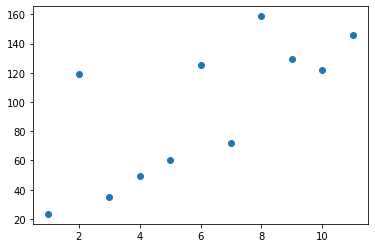

Correlation coefficient: 0.7219092417238022


In [21]:
a = np.arange(1, 12) # np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
b = a * 10 + np.random.random(len(a))*100

plt.scatter(a, b)
plt.show() 

print(f"Correlation coefficient: {np.corrcoef(a, b)[0, 1]}")

## Correlation Math

The correlation between two variables X and Y can be calculated as below:  
${\displaystyle
\rho_{X,Y} = \text{corr}(X,Y) = \frac{cov(X, Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}
}$
  
  
  
With samples, we can estimate the correlation as below: 

${\displaystyle r_{X, Y} = \frac {\sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2 \sum\limits_{i=1}^{n} (y_i - \bar{y})^2 } }}$

# 2. Timeseries

- Series of observations in a regular interval 
- Example: energy demand data, stock market price, hourly temperature data, etc.
- Often times, the best predictor for timeseries data is previous values in the series. For example, using yesterday's value to predict the today's value. This kind of model is called **Autoregressive model**. 
- A simple AR model that uses the previous point to predict the next point: 
$$
x_t = C + \varphi x_{t-1} + \epsilon_t
$$			

- We could use yesterday's value, but why not the day before yesterday? what about three days ago? 
- If there is any pattern in the data, we could determine it easily.

Let's see an example.

In [3]:
a = np.array([1, 2, 3, 4] * 5)

df = pd.DataFrame({'s': a})

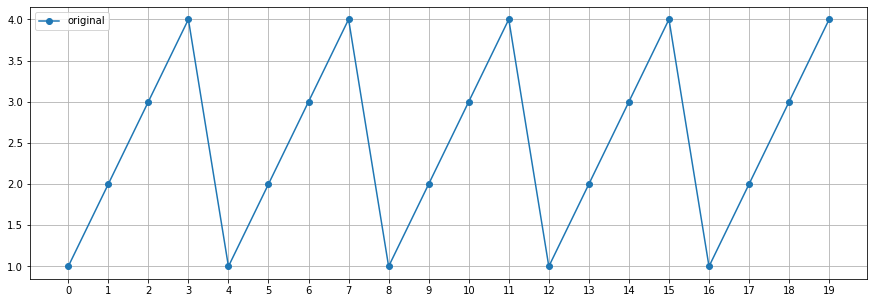

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df['s'], '-o')
plt.legend(['original'])
plt.xticks(range(len(a)))
plt.grid(True)
plt.show()

How can we determine how periodic this data is? How relevant the previous points are? We use lagged timeseries to understand that.

In [5]:
df['s1'] = df['s'].shift(1)
df['s2'] = df['s'].shift(2)
df['s3'] = df['s'].shift(3)
df['s4'] = df['s'].shift(4)
df['s5'] = df['s'].shift(5)

In [6]:
df

,s,s1,s2,s3,s4,s5
0,1,NaN,NaN,NaN,NaN,NaN
1,2,1.0,NaN,NaN,NaN,NaN
2,3,2.0,1.0,NaN,NaN,NaN
3,4,3.0,2.0,1.0,NaN,NaN
4,1,4.0,3.0,2.0,1.0,NaN
5,2,1.0,4.0,3.0,2.0,1.0
6,3,2.0,1.0,4.0,3.0,2.0
7,4,3.0,2.0,1.0,4.0,3.0
8,1,4.0,3.0,2.0,1.0,4.0
9,2,1.0,4.0,3.0,2.0,1.0


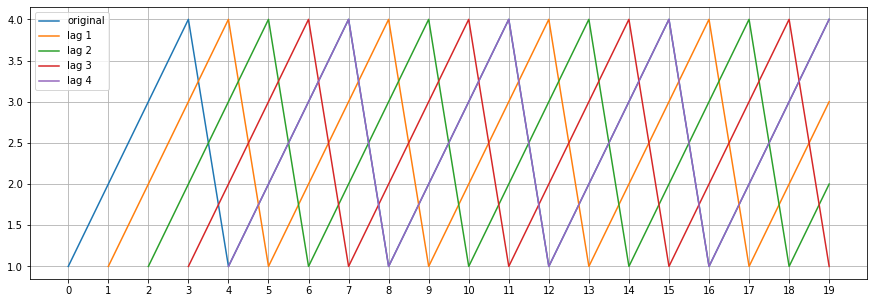

In [29]:
i = 5  # change this from 1 to 5

legends = ['original', 'lag 1', 'lag 2', 'lag 3', 'lag 4', 'lag 5']

fig, ax = plt.subplots(figsize=(15, 5)) 
plt.plot(df[df.columns[:i]])
plt.legend(legends[:i]) 
plt.xticks(range(len(df)))
plt.grid(True)

plt.show()

# 3. Autocorrelation

Autocorrelation is the correlation between a sequence and a lagged itself. It measure how similar a series is to itself several periods ago. 

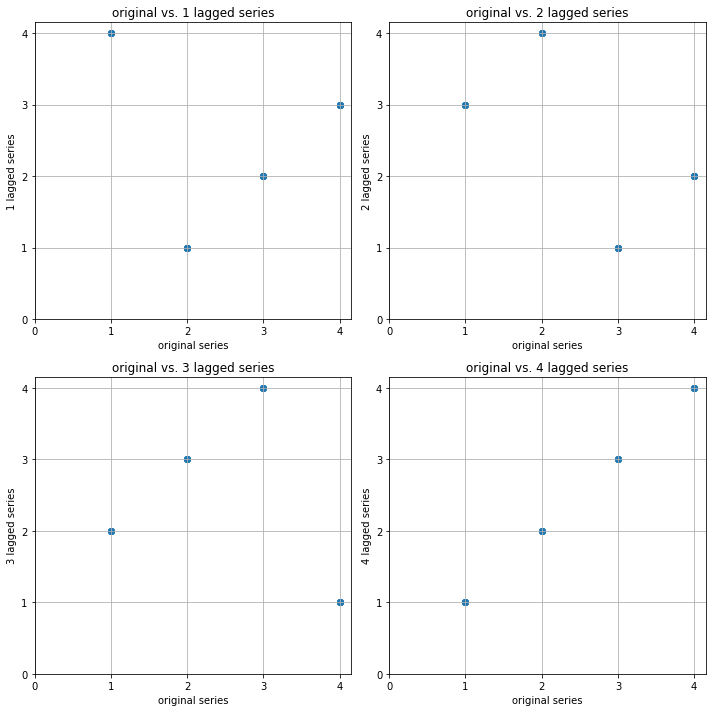

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for lag in range(1, 5):
    row, col = (lag-1)//2, (lag-1)%2
    ax = axes[row, col]
    ax.scatter(df['s'], df[f's{lag}'])
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.grid(True)

    ax.set_title(f'original vs. {lag} lagged series')
    ax.set_xlabel('original series')
    ax.set_ylabel(f'{lag} lagged series')

plt.tight_layout()
plt.show()

## statsmodel ACF 

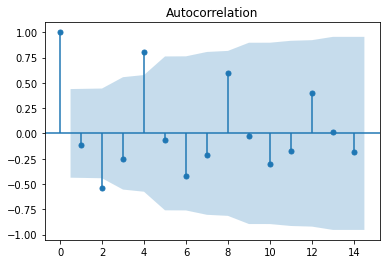

In [9]:
sgt.plot_acf(df['s'])
plt.show()

In [10]:
sts.acf(df['s'])

array([ 1.  , -0.11, -0.54, -0.25,  0.8 , -0.07, -0.42, -0.21,  0.6 ,
       -0.03, -0.3 , -0.17,  0.4 ,  0.01, -0.18, -0.13,  0.2 ,  0.05,
       -0.06, -0.09])

## ACF math


${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$


# 4. Partial Autocorrelation

Partial autocorrelation is the direct correlation between two periods exluding indirect correlation. In other words, Partial autocorrelation at lag k is the correlation between $X_t$ and $X_{t-k}$ that is not accounted for by lag 1 through $k-1$.

This is useful when determining the components to include in an auto regressive model because we know a good cut-off point instead of including all the relavant components far in the future. 

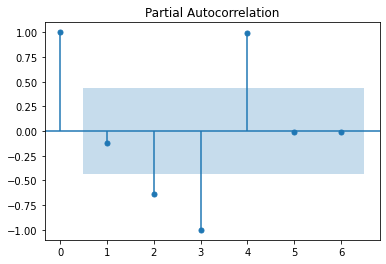

In [11]:
sgt.plot_pacf(df['s'], lags=6, method='ols')
plt.show()

In [12]:
sts.pacf(df['s'], nlags=6, method='ols')

array([ 1.        , -0.11627907, -0.64      , -1.        ,  0.99038462,
       -0.00483092, -0.00485437])

### PACF calculation


<img src='images/PACF_k2.png'>

### Generalize

<img src='images/PACF_k.png'>

### OLS Calculation

In [13]:
# s <-> s2 

lm = LinearRegression()
x = df.loc[2:, ['s1']]
y = df.loc[2:, 's']
model = lm.fit(x, y)
resid0 = y - model.predict(x)

lm = LinearRegression()
x = df.loc[2:, ['s1']]
y = df.loc[2:, 's2']
model = lm.fit(x, y)
resid1 = y - model.predict(x)

np.corrcoef(resid0, resid1)[0, 1]

-0.6399999999999999

In [14]:
# s <-> s3
idx = 3

lm = LinearRegression()
x = df.loc[idx:, ['s1', 's2']]
y = df.loc[idx:, 's']
model = lm.fit(x, y)
resid0 = y - model.predict(x)

lm = LinearRegression()
x = df.loc[idx:, ['s1', 's2']]
y = df.loc[idx:, 's3']
model = lm.fit(x, y)
resid1 = y - model.predict(x)

np.corrcoef(resid0, resid1)[0, 1]

-1.0

In [15]:
# s <-> s4 
dflm = LinearRegression()
x = df.loc[4:, ['s1', 's2', 's3']]
y = df.loc[4:, 's']
model = lm.fit(x, y)
resid0 = y - model.predict(x)

lm = LinearRegression()
x = df.loc[4:, ['s1', 's2', 's3']]
y = df.loc[4:, 's4']
model = lm.fit(x, y)
resid1 = y - model.predict(x)

np.corrcoef(resid0, resid1)[0, 1]

1.0

# References

- [Understanding Partial Auto-Correlation](https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac)
- [statsmodels.tsa.stattools.pacf](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html)
- [Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)
- [Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation)
